Distribution of articles over time

Monthly article frequency

In [1]:
import os

import pandas as pd
%matplotlib notebook
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import rc
rc('text', usetex=True)

In [2]:
# get all the files
path = 'articles/article_text'
files = os.listdir(path)

In [3]:
# keep only the date (first part of the filename)
files = [file.split()[0] for file in files]
# only up to month (drop last bit, the day)
files = ['-'.join(file.split('-')[:-1]) for file in files]
# transform into pandas series, for easier plotting later
dates = pd.Series(files)

In [4]:
# count number of artices per month
date_counts = dates.value_counts().sort_index()
date_counts.index = pd.to_datetime(date_counts.index)

<IPython.core.display.Javascript object>


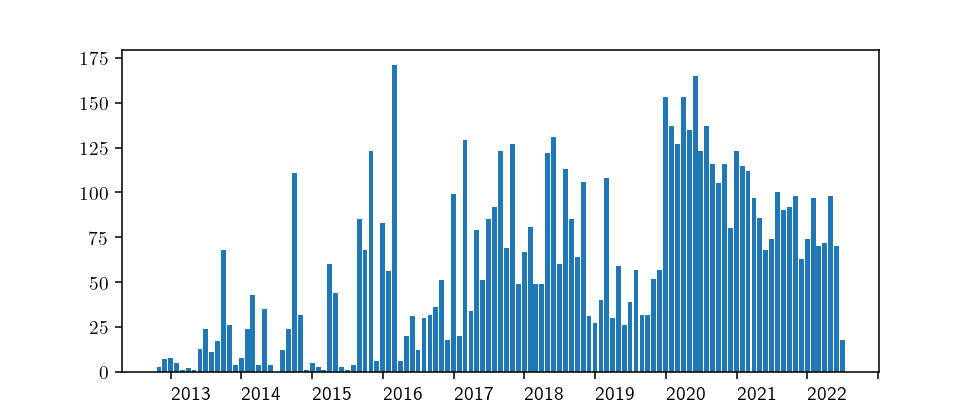

C:\Users\mOkuneva\AppData\Local\Temp\2\ipykernel_13360\573467419.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels, ha='left')


In [5]:
#sns.set_style("whitegrid")

plt.figure(figsize=(7, 3))
# plt.title('Number of articles per month')
plt.bar(date_counts.index, date_counts, width=25)

ax = plt.gca()
labels = list(range(2012, 2023))
ax.set_xticklabels(labels, ha='left')

plt.savefig('no_articles_per_month_hist.png')

In [6]:
date_counts.sort_index(inplace=True)

<IPython.core.display.Javascript object>


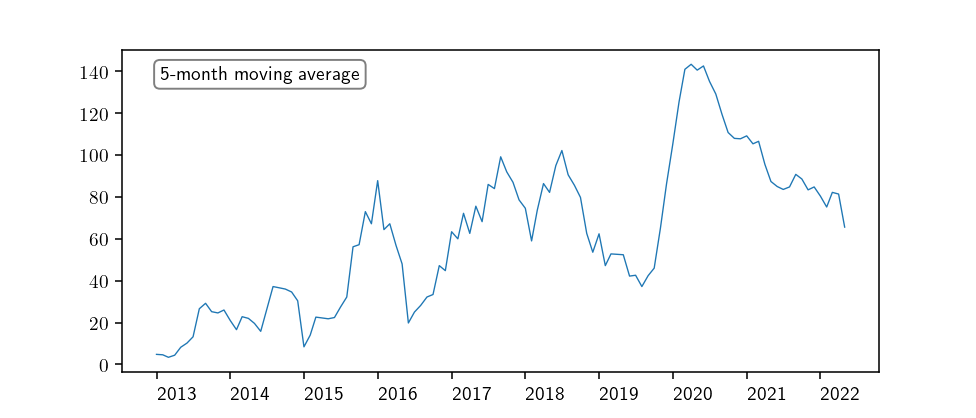

C:\Users\mOkuneva\AppData\Local\Temp\2\ipykernel_13360\4177127801.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels, ha='left')
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


In [7]:
# line plot
date_counts_smooth = date_counts.rolling(5, center=True).mean()


plt.figure(figsize=(7, 3))
#plt.title('Number of articles per month')
plt.plot(date_counts_smooth.index, date_counts_smooth, lw=0.7)

ax = plt.gca()
labels = list(range(2012, 2023))
ax.set_xticklabels(labels, ha='left')

props = dict(boxstyle='round', facecolor='white', edgecolor='black', alpha=0.5)
ax.text(0.05, 0.95, "5-month moving average", transform=ax.transAxes, fontsize=10,
                    verticalalignment='top', bbox=props)

plt.savefig('no_articles_per_month_line.png')
plt.savefig('no_articles_per_month_line.eps')

<IPython.core.display.Javascript object>


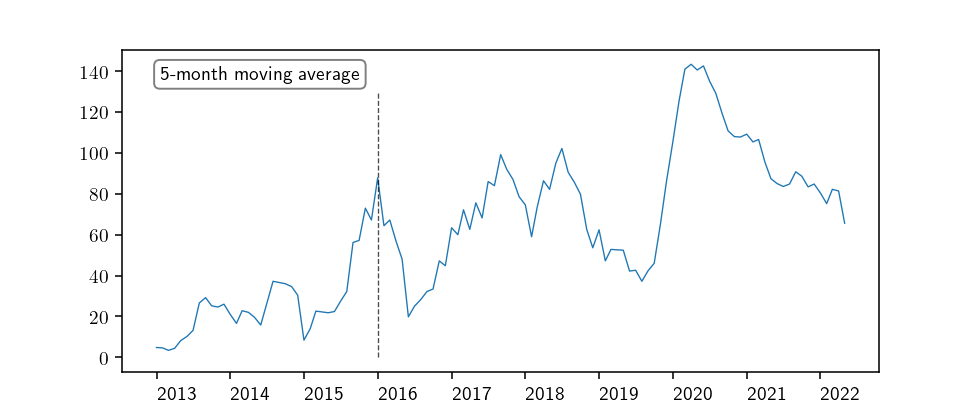

C:\Users\mOkuneva\AppData\Local\Temp\2\ipykernel_13360\3450269628.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels, ha='left')
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


In [8]:
# in case someone wants to add our cut-off date to the figure

plt.figure(figsize=(7, 3))
#plt.title('Number of articles per month')
plt.plot(date_counts_smooth.index, date_counts_smooth, lw=0.7)

ax = plt.gca()
labels = list(range(2012, 2023))
ax.set_xticklabels(labels, ha='left')

props = dict(boxstyle='round', facecolor='white', edgecolor='black', alpha=0.5)
ax.text(0.05, 0.95, "5-month moving average", transform=ax.transAxes, fontsize=10,
                    verticalalignment='top', bbox=props)

plt.vlines(pd.to_datetime('2016-01-01'), 0, 130, ls='--', color="black", lw=0.7, alpha=0.7)
plt.savefig('no_articles_per_month_line_cutoff.png')
plt.savefig('no_articles_per_month_line_cutoff.eps')